In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import patsy
from matplotlib import pyplot as plt
sns.set(context='paper')
%matplotlib inline

In [2]:
# https://people.duke.edu/~ccc14/sta-663/PyStan.html
import pystan


In [4]:
model_code1 = open('regression.normal.stan', 'r').read()
model_code2 = open('regression.mod.stan', 'r').read()
print(model_code1)
print(model_code2)

// https://github.com/stan-dev/example-models/blob/master/misc/linear-regression/regression.stan

data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(0,10);    
  beta ~ normal(0,10);
  sigma ~ cauchy(0,5);
  for (n in 1:N)
    y[n] ~ normal(alpha + beta * x[n], sigma);
}
// modified to feed in priors

data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
  int alpha_mu;
  int alpha_std;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(alpha_mu,alpha_std);    
  beta ~ normal(0,10);
  sigma ~ cauchy(0,5);
  for (n in 1:N)
    y[n] ~ normal(alpha + beta * x[n], sigma);
}


In [5]:
data = { 'N': 3, 'y': [5, 12, 24], 'x': [1,2,3]}

fit = pystan.stan(model_code=model_code1, data=data, iter=1000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_945ac3bec53c92c6f8d41696ea2730ba NOW.


In [6]:
print(fit)

Inference for Stan model: anon_model_945ac3bec53c92c6f8d41696ea2730ba.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha  -3.66    0.47    5.1 -12.35  -6.22  -4.31  -1.51   8.49    116    1.0
beta    8.65    0.25   2.56   2.67   7.73    9.0  10.01  12.97    102    1.0
sigma   3.59    0.32    3.1   0.62   1.73   2.65    4.4  12.59     94   1.01
lp__   -4.59    0.18   1.71  -8.72  -5.38  -4.37  -3.19  -2.46     87    1.0

Samples were drawn using NUTS at Mon Oct  9 19:48:58 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


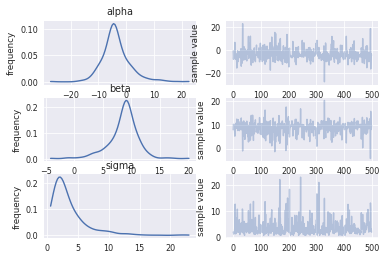

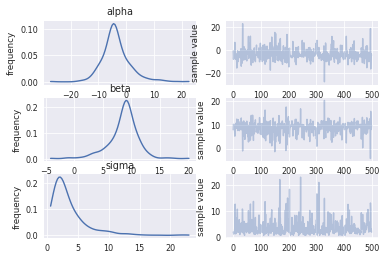

In [9]:
fit.plot()

In [11]:
data2 = { 'N': 3, 'y': [5, 12, 24], 'x': [1,2,3], 'alpha_mu': 0, 'alpha_std': 10}

fit2 = pystan.stan(model_code=model_code2, data=data2, iter=1000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c004327b4b79f426dc9eda46fca9af24 NOW.


In [12]:
print(fit2)

Inference for Stan model: anon_model_c004327b4b79f426dc9eda46fca9af24.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha  -2.97    0.46    5.2  -11.3  -6.32  -3.77   0.05   8.63    127    1.0
beta    8.35    0.22   2.52   2.24   6.99   8.76  10.05  12.46    136    1.0
sigma   4.26    0.56   2.89   1.37   2.24   3.31   5.44  12.22     27   1.05
lp__   -4.75     0.2   1.63   -8.6  -5.69  -4.42   -3.5  -2.58     65   1.07

Samples were drawn using NUTS at Mon Oct  9 19:56:43 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


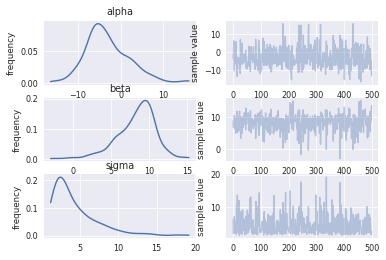

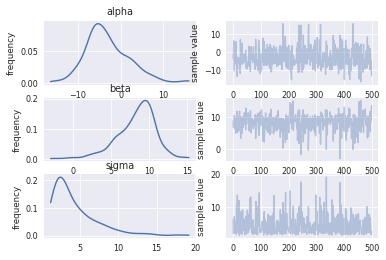

In [13]:
fit2.plot()

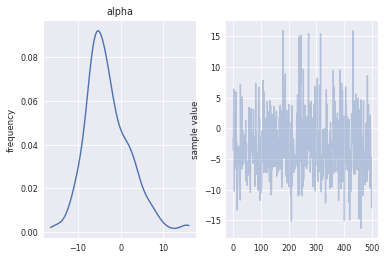

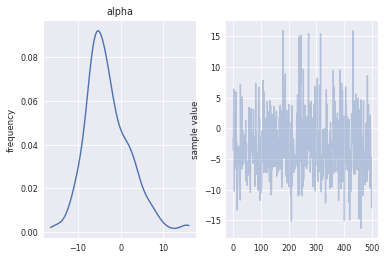

In [16]:
fit2.plot('alpha')

In [24]:
model_code3 = open('regression.mod2.stan', 'r').read()
print(model_code3)

// modified to feed in priors
// attempting to put in vector rather than int

data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
  int n2;
  int alpha_mu[3];
  int alpha_std[3];
}
parameters {
  real alpha[3];
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(alpha_mu,alpha_std);    
  beta ~ normal(0,10);
  sigma ~ cauchy(0,5);
  for (n in 1:N)
    y[n] ~ normal(alpha[1] + beta * x[n], sigma);
}


In [25]:
data3 = { 'N': 3, 'y': [5, 12, 24], 'x': [1,2,3], 'n2': 3, 'alpha_mu': [0, 50, 50], 'alpha_std': [10, 30, 30]}

fit3 = pystan.stan(model_code=model_code3, data=data3, iter=1000, chains=1)

ValueError: Failed to parse Stan model 'anon_model_35984a2118f9ec4561dfeed330deea03'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

No matches for: 

  real[] ~ normal(int[], int[])

Available argument signatures for normal:

  real ~ normal(real, real)
  real ~ normal(real, real[])
  real ~ normal(real, vector)
  real ~ normal(real, row vector)
  real ~ normal(real[], real)
  real ~ normal(real[], real[])
  real ~ normal(real[], vector)
  real ~ normal(real[], row vector)
  real ~ normal(vector, real)
  real ~ normal(vector, real[])
  real ~ normal(vector, vector)
  real ~ normal(vector, row vector)
  real ~ normal(row vector, real)
  real ~ normal(row vector, real[])
  real ~ normal(row vector, vector)
  real ~ normal(row vector, row vector)
  real[] ~ normal(real, real)
  real[] ~ normal(real, real[])
  real[] ~ normal(real, vector)
  real[] ~ normal(real, row vector)
  real[] ~ normal(real[], real)
  real[] ~ normal(real[], real[])
  real[] ~ normal(real[], vector)
  real[] ~ normal(real[], row vector)
  real[] ~ normal(vector, real)
  real[] ~ normal(vector, real[])
  real[] ~ normal(vector, vector)
  real[] ~ normal(vector, row vector)
  real[] ~ normal(row vector, real)
  real[] ~ normal(row vector, real[])
  real[] ~ normal(row vector, vector)
  real[] ~ normal(row vector, row vector)
  vector ~ normal(real, real)
  vector ~ normal(real, real[])
  vector ~ normal(real, vector)
  vector ~ normal(real, row vector)
  vector ~ normal(real[], real)
  vector ~ normal(real[], real[])
  vector ~ normal(real[], vector)
  vector ~ normal(real[], row vector)
  vector ~ normal(vector, real)
  vector ~ normal(vector, real[])
  vector ~ normal(vector, vector)
  vector ~ normal(vector, row vector)
  vector ~ normal(row vector, real)
  vector ~ normal(row vector, real[])
  vector ~ normal(row vector, vector)
  vector ~ normal(row vector, row vector)
  row vector ~ normal(real, real)
  row vector ~ normal(real, real[])
  row vector ~ normal(real, vector)
  row vector ~ normal(real, row vector)
  row vector ~ normal(real[], real)
  row vector ~ normal(real[], real[])
  row vector ~ normal(real[], vector)
  row vector ~ normal(real[], row vector)
  row vector ~ normal(vector, real)
  row vector ~ normal(vector, real[])
  row vector ~ normal(vector, vector)
  row vector ~ normal(vector, row vector)
  row vector ~ normal(row vector, real)
  row vector ~ normal(row vector, real[])
  row vector ~ normal(row vector, vector)
  row vector ~ normal(row vector, row vector)

require real scalar return type for probability function.
  error in 'unkown file name' at line 18, column 38
  -------------------------------------------------
    16: }
    17: model {
    18:   alpha ~ normal(alpha_mu,alpha_std);    
                                             ^
    19:   beta ~ normal(0,10);
  -------------------------------------------------



This is the key message:

```
Available argument signatures for normal:

  real ~ normal(real, real)
  real ~ normal(real, real[])
  real ~ normal(real, vector)
  real ~ normal(real, row vector)
  real ~ normal(real[], real)
  real ~ normal(real[], real[])
  real ~ normal(real[], vector)
  real ~ normal(real[], row vector)
  real ~ normal(vector, real)
  real ~ normal(vector, real[])
  real ~ normal(vector, vector)
  real ~ normal(vector, row vector)
  real ~ normal(row vector, real)
  real ~ normal(row vector, real[])
  real ~ normal(row vector, vector)
  real ~ normal(row vector, row vector)
  real[] ~ normal(real, real)
  real[] ~ normal(real, real[])
  real[] ~ normal(real, vector)
  real[] ~ normal(real, row vector)
  real[] ~ normal(real[], real)
  real[] ~ normal(real[], real[])
  real[] ~ normal(real[], vector)
  real[] ~ normal(real[], row vector)
  real[] ~ normal(vector, real)
  real[] ~ normal(vector, real[])
  real[] ~ normal(vector, vector)
  real[] ~ normal(vector, row vector)
  real[] ~ normal(row vector, real)
  real[] ~ normal(row vector, real[])
  real[] ~ normal(row vector, vector)
  real[] ~ normal(row vector, row vector)
  vector ~ normal(real, real)
  vector ~ normal(real, real[])
  vector ~ normal(real, vector)
  vector ~ normal(real, row vector)
  vector ~ normal(real[], real)
  vector ~ normal(real[], real[])
  vector ~ normal(real[], vector)
  vector ~ normal(real[], row vector)
  vector ~ normal(vector, real)
  vector ~ normal(vector, real[])
  vector ~ normal(vector, vector)
  vector ~ normal(vector, row vector)
  vector ~ normal(row vector, real)
  vector ~ normal(row vector, real[])
  vector ~ normal(row vector, vector)
  vector ~ normal(row vector, row vector)
  row vector ~ normal(real, real)
  row vector ~ normal(real, real[])
  row vector ~ normal(real, vector)
  row vector ~ normal(real, row vector)
  row vector ~ normal(real[], real)
  row vector ~ normal(real[], real[])
  row vector ~ normal(real[], vector)
  row vector ~ normal(real[], row vector)
  row vector ~ normal(vector, real)
  row vector ~ normal(vector, real[])
  row vector ~ normal(vector, vector)
  row vector ~ normal(vector, row vector)
  row vector ~ normal(row vector, real)
  row vector ~ normal(row vector, real[])
  row vector ~ normal(row vector, vector)
  row vector ~ normal(row vector, row vector)
```
  
Go for ` ~ normal(vector, vector)` (with vector types) or ` ~ normal(real[], real[])` (with array types). (There's a distinction according to the manual.)

In [26]:
model_code4 = open('regression.mod3.stan', 'r').read()
print(model_code4)

data4 = { 'N': 3, 'y': [5, 12, 24], 'x': [1,2,3], 'n2': 3, 'alpha_mu': [0, 50, 50], 'alpha_std': [10, 30, 30]}

fit4 = pystan.stan(model_code=model_code4, data=data4, iter=1000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_93df5331fb210d8c002af0e19fba203a NOW.


// modified to feed in priors
// attempting to put in vector rather than int

data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
  real alpha_mu[3];
  real alpha_std[3];
}
parameters {
  real alpha[3];
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(alpha_mu,alpha_std);    
  beta ~ normal(0,10);
  sigma ~ cauchy(0,5);
  for (n in 1:N)
    y[n] ~ normal(alpha[1] + beta * x[n], sigma);
}


In [27]:
print(fit4)

Inference for Stan model: anon_model_93df5331fb210d8c002af0e19fba203a.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[0]  -3.11    0.51   5.58  -13.0  -6.38  -4.31  -0.86  10.69    121   1.01
alpha[1]  49.97    1.89  28.85  -9.19  32.25  49.01  69.08 105.67    233    1.0
alpha[2]  46.68     2.5  29.35  -5.95  25.41  43.66  65.25 109.52    138   1.02
beta       8.22    0.38   3.36   0.15   7.23   8.78  10.02  13.24     80   1.03
sigma      4.58    0.73   5.43   0.92   1.86   3.05   4.97  19.04     55   1.02
lp__      -5.89     0.3   2.31 -11.35  -6.94  -5.32  -4.25  -2.75     61   1.02

Samples were drawn using NUTS at Mon Oct  9 20:20:54 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [31]:
fit4.extract().keys()

odict_keys(['alpha', 'beta', 'sigma', 'lp__'])

KeyError: 'alpha[1]'

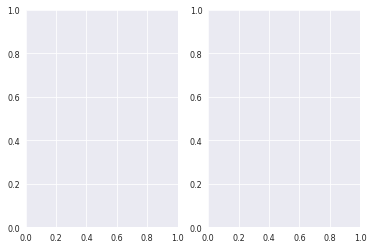

In [30]:
fit4.plot('alpha[1]')

OK, got that to work. except note that when extracting from fit output, pystan groups all alpha array elements under one object. 

now let's try with matrices. can we do same thing: `matrix[M,N] ... ~ normal(matrix[M,N] .., matrix[M,N] ..)` ?

In [32]:
model_code5 = open('regression.mod4.stan', 'r').read()
print(model_code5)

data5 = { 'N': 3, 'y': [5, 12, 24], 'x': [1,2,3], 'alpha_mu': [[0, 50, 50], [0, 50, 50], [0, 50, 50]], 'alpha_std': [[10, 30, 30], [10, 30, 30], [10, 30, 30]]}

fit5 = pystan.stan(model_code=model_code5, data=data5, iter=1000, chains=1)

// modified to feed in priors
// attempting to put in vector rather than int
// update: now trying to find the available argument signatures for matrix

data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
  matrix[3,3] alpha_mu;
  matrix[3,3] alpha_std;
}
parameters {
  matrix[3,3] alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(alpha_mu,alpha_std);    
  beta ~ normal(0,10);
  sigma ~ cauchy(0,5);
  for (n in 1:N)
    y[n] ~ normal(alpha[1,1] + beta * x[n], sigma);
}


ValueError: Failed to parse Stan model 'anon_model_a72d8007241678ea0f2d8b8867d2055b'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

No matches for: 

  matrix ~ normal(matrix, matrix)

Available argument signatures for normal:

  real ~ normal(real, real)
  real ~ normal(real, real[])
  real ~ normal(real, vector)
  real ~ normal(real, row vector)
  real ~ normal(real[], real)
  real ~ normal(real[], real[])
  real ~ normal(real[], vector)
  real ~ normal(real[], row vector)
  real ~ normal(vector, real)
  real ~ normal(vector, real[])
  real ~ normal(vector, vector)
  real ~ normal(vector, row vector)
  real ~ normal(row vector, real)
  real ~ normal(row vector, real[])
  real ~ normal(row vector, vector)
  real ~ normal(row vector, row vector)
  real[] ~ normal(real, real)
  real[] ~ normal(real, real[])
  real[] ~ normal(real, vector)
  real[] ~ normal(real, row vector)
  real[] ~ normal(real[], real)
  real[] ~ normal(real[], real[])
  real[] ~ normal(real[], vector)
  real[] ~ normal(real[], row vector)
  real[] ~ normal(vector, real)
  real[] ~ normal(vector, real[])
  real[] ~ normal(vector, vector)
  real[] ~ normal(vector, row vector)
  real[] ~ normal(row vector, real)
  real[] ~ normal(row vector, real[])
  real[] ~ normal(row vector, vector)
  real[] ~ normal(row vector, row vector)
  vector ~ normal(real, real)
  vector ~ normal(real, real[])
  vector ~ normal(real, vector)
  vector ~ normal(real, row vector)
  vector ~ normal(real[], real)
  vector ~ normal(real[], real[])
  vector ~ normal(real[], vector)
  vector ~ normal(real[], row vector)
  vector ~ normal(vector, real)
  vector ~ normal(vector, real[])
  vector ~ normal(vector, vector)
  vector ~ normal(vector, row vector)
  vector ~ normal(row vector, real)
  vector ~ normal(row vector, real[])
  vector ~ normal(row vector, vector)
  vector ~ normal(row vector, row vector)
  row vector ~ normal(real, real)
  row vector ~ normal(real, real[])
  row vector ~ normal(real, vector)
  row vector ~ normal(real, row vector)
  row vector ~ normal(real[], real)
  row vector ~ normal(real[], real[])
  row vector ~ normal(real[], vector)
  row vector ~ normal(real[], row vector)
  row vector ~ normal(vector, real)
  row vector ~ normal(vector, real[])
  row vector ~ normal(vector, vector)
  row vector ~ normal(vector, row vector)
  row vector ~ normal(row vector, real)
  row vector ~ normal(row vector, real[])
  row vector ~ normal(row vector, vector)
  row vector ~ normal(row vector, row vector)

require real scalar return type for probability function.
  error in 'unkown file name' at line 18, column 38
  -------------------------------------------------
    16: }
    17: model {
    18:   alpha ~ normal(alpha_mu,alpha_std);    
                                             ^
    19:   beta ~ normal(0,10);
  -------------------------------------------------



didn't work, need to iterate over the rows it seems. trying again:

In [33]:
model_code5 = open('regression.mod5.stan', 'r').read()
print(model_code5)

data5 = { 'N': 3, 'y': [5, 12, 24], 'x': [1,2,3], 'alpha_mu': [[0, 50, 50], [0, 50, 50], [0, 50, 50]], 'alpha_std': [[10, 30, 30], [10, 30, 30], [10, 30, 30]]}

fit5 = pystan.stan(model_code=model_code5, data=data5, iter=1000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_662788dc39f1043eeb7cf74845e84f7c NOW.


// modified to feed in priors
// attempting to put in vector rather than int
// update: now trying to find the available argument signatures for matrix

data {
  int<lower=0> N;
  vector[N] y;
  vector[N] x;
  matrix[3,3] alpha_mu;
  matrix[3,3] alpha_std;
}
parameters {
  matrix[3,3] alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  for (m in 1:rows(alpha_mu)) {
    alpha[m] ~ normal(alpha_mu[m], alpha_std[m]);    
  }
  beta ~ normal(0,10);
  sigma ~ cauchy(0,5);
  for (n in 1:N)
    y[n] ~ normal(alpha[1,1] + beta * x[n], sigma);
}


In [34]:
print(fit5)

Inference for Stan model: anon_model_662788dc39f1043eeb7cf74845e84f7c.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[0,0]  -2.49    0.39   5.43 -11.92  -5.95  -3.12   0.49  10.38    190   1.01
alpha[1,0]   0.97    0.43   9.69 -17.02  -5.83    0.8   7.81  20.04    500    1.0
alpha[2,0]  -0.23    0.46  10.22 -20.67  -5.96   0.03   5.75  20.09    500    1.0
alpha[0,1]  50.15    1.37  30.55 -13.05  30.52  50.39   70.1 115.03    500    1.0
alpha[1,1]  47.01    1.25  27.87  -5.64  28.16  47.32  66.43  98.71    500    1.0
alpha[2,1]  50.46    1.37  30.65  -9.36  30.37   50.2  71.06 111.35    500    1.0
alpha[0,2]  48.58    1.42  31.83 -15.45  26.91  47.88   71.4 111.93    500    1.0
alpha[1,2]  49.65    1.31  29.25  -3.53  29.27  49.47  68.44  109.6    500    1.0
alpha[2,2]   50.0    1.37  30.56  -10.5  29.55  48.54  70.42 107.19    500  

yes, it worked! (below is expected output for comparison)

In [35]:
print(fit)

Inference for Stan model: anon_model_945ac3bec53c92c6f8d41696ea2730ba.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha  -3.66    0.47    5.1 -12.35  -6.22  -4.31  -1.51   8.49    116    1.0
beta    8.65    0.25   2.56   2.67   7.73    9.0  10.01  12.97    102    1.0
sigma   3.59    0.32    3.1   0.62   1.73   2.65    4.4  12.59     94   1.01
lp__   -4.59    0.18   1.71  -8.72  -5.38  -4.37  -3.19  -2.46     87    1.0

Samples were drawn using NUTS at Mon Oct  9 19:48:58 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
